# Text classification using TfidVectorization and Multinomial Gaussian Naive Bayes
Using `20_newsgroups` dataset

## Import and inspect data

In [1]:
import numpy
import pandas

In [2]:
data = pandas.read_csv("/users/danielcorcoran/desktop/github_repos/python_nb_sklearn_gaussian_naive_bayes/20_newsgroups_processed/20_newsgroups.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 5 columns):
row_index       19997 non-null int64
text            19997 non-null object
category        19997 non-null object
full_path       19997 non-null object
text_cleaned    19997 non-null object
dtypes: int64(1), object(4)
memory usage: 781.2+ KB


In [4]:
data.head()

,row_index,text,category,full_path,text_cleaned
0,0,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,/users/danielcorcoran/desktop/github_repos/pyt...,Newsgroups: talk.politics.mideastPath: cantalo...
1,1,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,/users/danielcorcoran/desktop/github_repos/pyt...,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....
2,2,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,/users/danielcorcoran/desktop/github_repos/pyt...,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....
3,3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.politics.mideast,/users/danielcorcoran/desktop/github_repos/pyt...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....
4,4,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...,talk.politics.mideast,/users/danielcorcoran/desktop/github_repos/pyt...,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...


In [5]:
categories = data["category"].unique()

In [6]:
for cat in sorted(categories):
    print(cat)

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


### I want to classify a subset, not the entire dataset
- comp.graphics
- comp.os.ms-windows.misc
- comp.sys.ibm.pc.hardware
- comp.sys.mac.hardware
- comp.windows.x

In [7]:
subset = data[(data["category"] == "comp.graphics") | 
             (data["category"] == "comp.os.ms-windows.misc") |
             (data["category"] == "comp.sys.ibm.pc.hardware") |
             (data["category"] == "comp.sys.mac.hardware") |
             (data["category"] == "comp.windows.x")]

### We have 5000 samples in our subset containing 5 text categories

In [8]:
subset.shape

(5000, 5)

In [9]:
data.shape

(19997, 5)

## Build Model

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Create feature matrix and target vector

In [11]:
X = subset["text_cleaned"]
y = subset["category"]

In [12]:
vectorizer = TfidfVectorizer()

### Transform feature matrix into sparse matrix using TFIDF Vectorizer

In [13]:
X_transformed = vectorizer.fit_transform(X)

In [14]:
X_transformed

<5000x135064 sparse matrix of type '<class 'numpy.float64'>'
	with 890202 stored elements in Compressed Sparse Row format>

### Instantiate multinomial naive bayes model

In [15]:
model = MultinomialNB()

### Split feature matrix and target vector into training and testing components

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transformed, y,
                                                test_size = 0.20,
                                                random_state = 0)

### Fit model to training data

In [17]:
model.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Make prediction with model using Xtest data

In [18]:
y_prediction = model.predict(Xtest)

### Calculate and print accuracy of model

In [19]:
accuracy = accuracy_score(y_prediction, ytest)

In [20]:
print("Accuracy of model: {0:.1%}".format(accuracy))

Accuracy of model: 89.1%


## Cross Validate Model

### Perform 10 fold cross validation on model

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
scoring = "accuracy"
kfold = 10
results = cross_val_score(model, Xtrain, ytrain, cv= kfold, scoring = scoring)

for result in results:
    print("Accuracy of result: {0:.1%}".format(result))

Accuracy of result: 89.8%
Accuracy of result: 92.0%
Accuracy of result: 88.6%
Accuracy of result: 88.1%
Accuracy of result: 91.0%
Accuracy of result: 91.2%
Accuracy of result: 88.9%
Accuracy of result: 89.4%
Accuracy of result: 89.7%
Accuracy of result: 91.5%


### Generate confusion matrix

In [24]:
labels = ['comp.graphics',
    'comp.os.ms-windows.misc',
    'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware',
    'comp.windows.x']

sorted_labels = sorted(labels)

sorted_labels_shortened = list(map(lambda x: x.replace("comp.",""), sorted_labels))

### Ensure labels are sorted before assigning them to heatmap

In [25]:
sorted_labels_shortened

['graphics',
 'os.ms-windows.misc',
 'sys.ibm.pc.hardware',
 'sys.mac.hardware',
 'windows.x']

In [28]:
import seaborn
import matplotlib.pyplot as plt
seaborn.set_style = "whitegrid"
seaborn.set(rc = {"figure.figsize":(14,8)},
           font_scale = 1.5)

Text(0.5,1,'Confusion Matrix\n Predicted vs True counts')

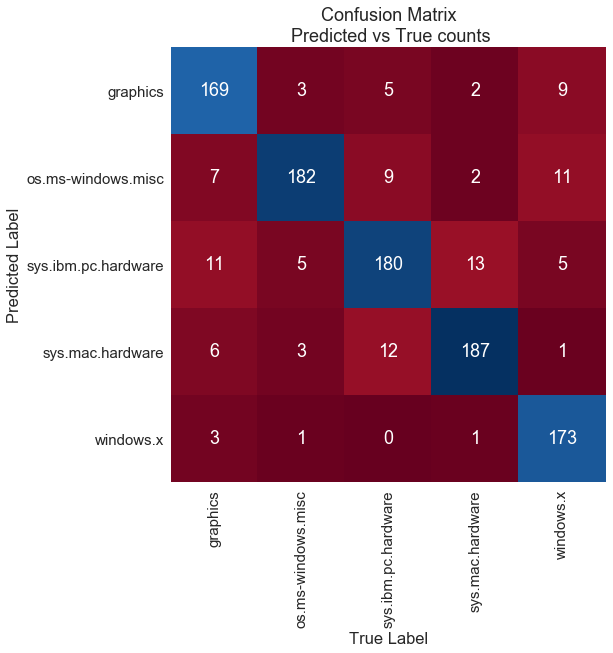

In [29]:
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(ytest, y_prediction)

seaborn.heatmap(confusion_matrix.T, 
               square  = True,
               annot = True,
               fmt = "d",
               cbar = False,
               cmap = "RdBu",
               xticklabels = sorted_labels_shortened,
               yticklabels = sorted_labels_shortened)

plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix\n Predicted vs True counts")